<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Rafael Lupovici Moritz*

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [3]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 10.5MB/s]


In [56]:
# Importação das bibliotecas
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
df

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801
5,2023-01-06,148.0,191.0,47.647219,2.362449,Orgânico,Mobile,9,2.559353,6.773194
6,2023-01-07,150.0,197.0,49.036840,2.662313,Direto,Mobile,4,2.501274,5.318291
7,2023-01-08,146.0,202.0,47.801333,2.356262,Pago,Desktop,9,2.693574,5.666004
8,2023-01-09,137.0,284.0,46.140695,2.651792,Social,Desktop,2,2.714130,6.134571
9,2023-01-10,131.0,254.0,46.729001,2.569731,Social,Desktop,10,2.698200,5.968601


## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [57]:
df['Mês de 2023'] = pd.to_datetime(df['Data']).dt.to_period('M')

average_sessions_month = df.groupby('Mês de 2023')['Sessões'].mean()

print("Média do número de sessões por mês:")
print(average_sessions_month)

Média do número de sessões por mês:
Mês de 2023
2023-01    299.774194
2023-02    603.750000
2023-03    769.000000
Freq: M, Name: Sessões, dtype: float64


##Matriz de correlação

Aqui eu plotei a matriz de correlação. Como o foco é aumentar a taxa de conversão, a variável mais importante é a 'Taxa de Conversão (%)'. Por isso, eu vou analisar apenas as variáveis mais próximas dela na matriz. Nessa caso as variáveis são: 'Sessões', 'Visitantes Únicos', 'Páginas por Sessão' e 'Tempo Médio de Sessão (minutos)'.

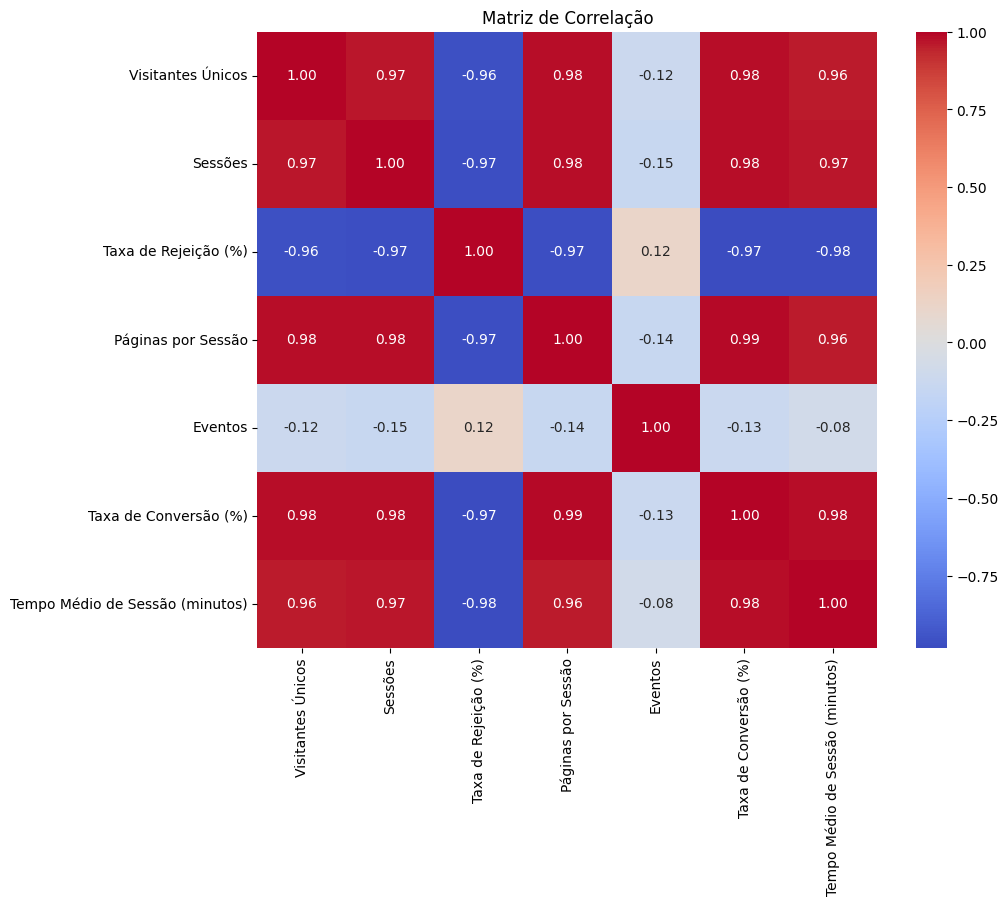

In [58]:
df_numeric = df.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação')
plt.show()

Abaixo eu plotei alguns gráficos temporais referentes às variáveis que citei acima e a 'Taxa de Conversão (%)' também, para vermos como elas são similares.

##Sessões

In [59]:
df['Data'] = pd.to_datetime(df['Data'])

average_sessions_month = df.groupby('Data')['Sessões'].mean().reset_index()

fig = px.line(average_sessions_month, x='Data', y='Sessões', title='Sessões por dia')
fig.update_traces(mode='markers+lines', marker=dict(color='blue', size=8))
fig.update_layout(xaxis_title='Data', yaxis_title='Número de sessões', xaxis_tickangle=-45, xaxis_tickformat='%Y-%m')
fig.show()

##Visitantes Únicos

In [33]:
df['Data'] = pd.to_datetime(df['Data'])

average_visitants_month = df.groupby('Data')['Visitantes Únicos'].mean().reset_index()

fig = px.line(average_visitants_month, x='Data', y='Visitantes Únicos', title='Visitantes Únicos por dia')
fig.update_traces(mode='markers+lines', marker=dict(color='blue', size=8))
fig.update_layout(xaxis_title='Data', yaxis_title='Número de Visitantes Únicos', xaxis_tickangle=-45, xaxis_tickformat='%Y-%m')
fig.show()

##Taxa de Conversão (%)

In [35]:
df['Data'] = pd.to_datetime(df['Data'])

average_conversion_month = df.groupby('Data')['Taxa de Conversão (%)'].mean().reset_index()

fig = px.line(average_conversion_month, x='Data', y='Taxa de Conversão (%)', title='Taxa de Conversão (%) por dia')
fig.update_traces(mode='markers+lines', marker=dict(color='blue', size=8))
fig.update_layout(xaxis_title='Data', yaxis_title='Número de Taxa de Conversão', xaxis_tickangle=-45, xaxis_tickformat='%Y-%m')
fig.show()

##Páginas por Sessão

In [44]:
df['Data'] = pd.to_datetime(df['Data'])

average_pages_month = df.groupby('Data')['Páginas por Sessão'].mean().reset_index()

fig = px.line(average_pages_month, x='Data', y='Páginas por Sessão', title='Páginas por Sessão por dia')
fig.update_traces(mode='markers+lines', marker=dict(color='blue', size=8))
fig.update_layout(xaxis_title='Data', yaxis_title='Número de Páginas por Sessão', xaxis_tickangle=-45, xaxis_tickformat='%Y-%m')
fig.show()

##Tempo Médio de Sessão (minutos)

In [45]:
df['Data'] = pd.to_datetime(df['Data'])

average_sessions_month = df.groupby('Data')['Tempo Médio de Sessão (minutos)'].mean().reset_index()

fig = px.line(average_sessions_month, x='Data', y='Tempo Médio de Sessão (minutos)', title='Tempo Médio de Sessão (minutos) por dia')
fig.update_traces(mode='markers+lines', marker=dict(color='blue', size=8))
fig.update_layout(xaxis_title='Data', yaxis_title='Tempo Médio de Sessão (minutos)', xaxis_tickangle=-45, xaxis_tickformat='%Y-%m')
fig.show()

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

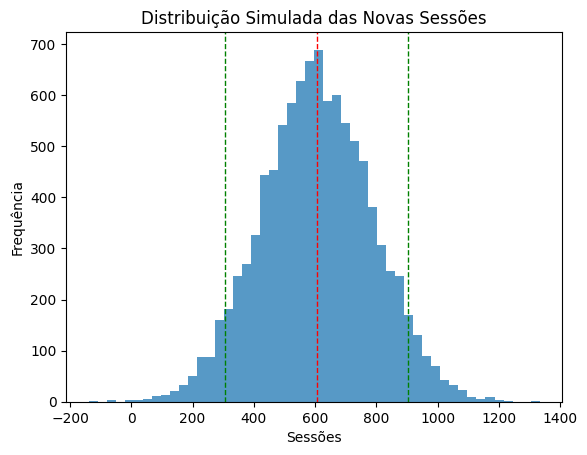

In [71]:
mean_sessions_pre_change = df.iloc[:30]['Sessões'].mean()
mean_sessions_post_change = df.iloc[30:]['Sessões'].mean()

# Diferença observada
observed_difference = mean_sessions_post_change - mean_sessions_pre_change

# Simulação de Monte Carlo
n_simulations = 10000
std_dev = df['Sessões'].std()  # Desvio padrão das taxas de rejeição para variabilidade

# Gerar efeitos simulados como uma distribuição normal centrada na diferença observada
simulated_effects = np.random.normal(loc=observed_difference, scale=std_dev, size=n_simulations)

# Taxa de rejeição base para simulação
base_sessions = mean_sessions_pre_change

# Calcular novas taxas de rejeição potenciais
new_sessions = base_sessions + simulated_effects

# Análise dos resultados
average_new_rejection_rate = np.mean(new_sessions)
percentile_5th = np.percentile(new_sessions, 5)
percentile_95th = np.percentile(new_sessions, 95)

plt.hist(new_sessions, bins=50, alpha=0.75)
plt.axvline(x=average_new_rejection_rate, color='r', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_5th, color='g', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_95th, color='g', linestyle='dashed', linewidth=1)
plt.title('Distribuição Simulada das Novas Sessões')
plt.xlabel('Sessões')
plt.ylabel('Frequência')
plt.show()

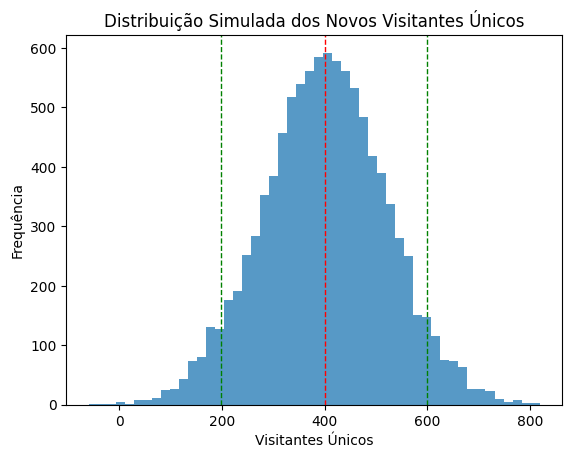

In [72]:
mean_sessions_pre_change = df.iloc[:30]['Visitantes Únicos'].mean()
mean_sessions_post_change = df.iloc[30:]['Visitantes Únicos'].mean()

# Diferença observada
observed_difference = mean_sessions_post_change - mean_sessions_pre_change

# Simulação de Monte Carlo
n_simulations = 10000
std_dev = df['Visitantes Únicos'].std()  # Desvio padrão das taxas de rejeição para variabilidade

# Gerar efeitos simulados como uma distribuição normal centrada na diferença observada
simulated_effects = np.random.normal(loc=observed_difference, scale=std_dev, size=n_simulations)

# Taxa de rejeição base para simulação
base_sessions = mean_sessions_pre_change

# Calcular novas taxas de rejeição potenciais
new_sessions = base_sessions + simulated_effects

# Análise dos resultados
average_new_rejection_rate = np.mean(new_sessions)
percentile_5th = np.percentile(new_sessions, 5)
percentile_95th = np.percentile(new_sessions, 95)

plt.hist(new_sessions, bins=50, alpha=0.75)
plt.axvline(x=average_new_rejection_rate, color='r', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_5th, color='g', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_95th, color='g', linestyle='dashed', linewidth=1)
plt.title('Distribuição Simulada dos Novos Visitantes Únicos')
plt.xlabel('Visitantes Únicos')
plt.ylabel('Frequência')
plt.show()

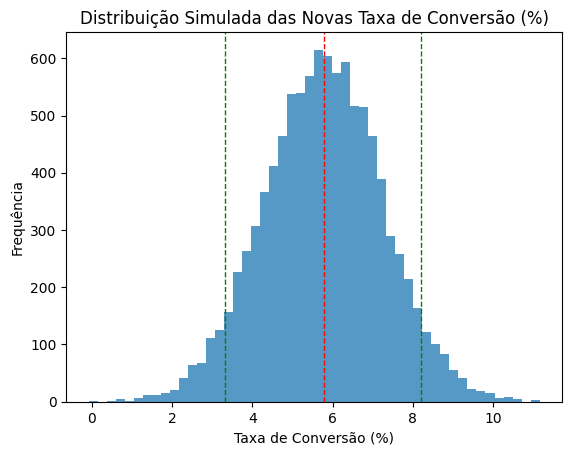

In [73]:
mean_sessions_pre_change = df.iloc[:30]['Taxa de Conversão (%)'].mean()
mean_sessions_post_change = df.iloc[30:]['Taxa de Conversão (%)'].mean()

# Diferença observada
observed_difference = mean_sessions_post_change - mean_sessions_pre_change

# Simulação de Monte Carlo
n_simulations = 10000
std_dev = df['Taxa de Conversão (%)'].std()  # Desvio padrão das taxas de rejeição para variabilidade

# Gerar efeitos simulados como uma distribuição normal centrada na diferença observada
simulated_effects = np.random.normal(loc=observed_difference, scale=std_dev, size=n_simulations)

# Taxa de rejeição base para simulação
base_sessions = mean_sessions_pre_change

# Calcular novas taxas de rejeição potenciais
new_sessions = base_sessions + simulated_effects

# Análise dos resultados
average_new_rejection_rate = np.mean(new_sessions)
percentile_5th = np.percentile(new_sessions, 5)
percentile_95th = np.percentile(new_sessions, 95)

plt.hist(new_sessions, bins=50, alpha=0.75)
plt.axvline(x=average_new_rejection_rate, color='r', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_5th, color='g', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_95th, color='g', linestyle='dashed', linewidth=1)
plt.title('Distribuição Simulada das Novas Taxa de Conversão (%)')
plt.xlabel('Taxa de Conversão (%)')
plt.ylabel('Frequência')
plt.show()

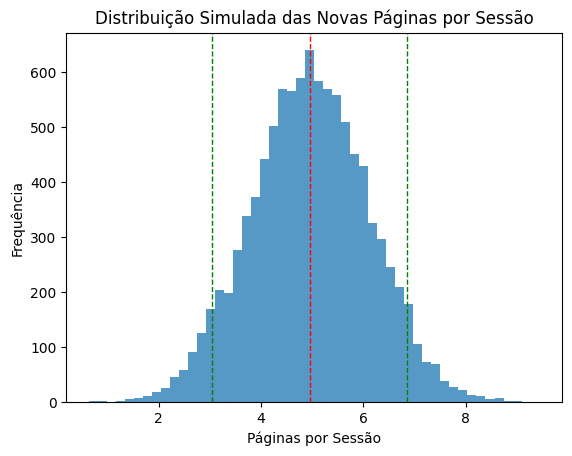

In [74]:
mean_sessions_pre_change = df.iloc[:30]['Páginas por Sessão'].mean()
mean_sessions_post_change = df.iloc[30:]['Páginas por Sessão'].mean()

# Diferença observada
observed_difference = mean_sessions_post_change - mean_sessions_pre_change

# Simulação de Monte Carlo
n_simulations = 10000
std_dev = df['Páginas por Sessão'].std()  # Desvio padrão das taxas de rejeição para variabilidade

# Gerar efeitos simulados como uma distribuição normal centrada na diferença observada
simulated_effects = np.random.normal(loc=observed_difference, scale=std_dev, size=n_simulations)

# Taxa de rejeição base para simulação
base_sessions = mean_sessions_pre_change

# Calcular novas taxas de rejeição potenciais
new_sessions = base_sessions + simulated_effects

# Análise dos resultados
average_new_rejection_rate = np.mean(new_sessions)
percentile_5th = np.percentile(new_sessions, 5)
percentile_95th = np.percentile(new_sessions, 95)

plt.hist(new_sessions, bins=50, alpha=0.75)
plt.axvline(x=average_new_rejection_rate, color='r', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_5th, color='g', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_95th, color='g', linestyle='dashed', linewidth=1)
plt.title('Distribuição Simulada das Novas Páginas por Sessão')
plt.xlabel('Páginas por Sessão')
plt.ylabel('Frequência')
plt.show()

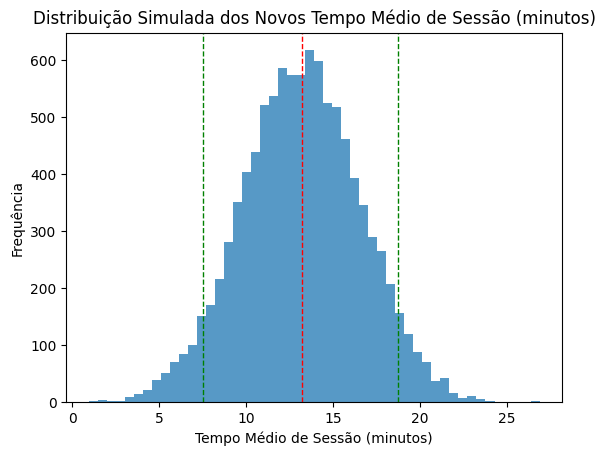

In [75]:
mean_sessions_pre_change = df.iloc[:30]['Tempo Médio de Sessão (minutos)'].mean()
mean_sessions_post_change = df.iloc[30:]['Tempo Médio de Sessão (minutos)'].mean()

# Diferença observada
observed_difference = mean_sessions_post_change - mean_sessions_pre_change

# Simulação de Monte Carlo
n_simulations = 10000
std_dev = df['Tempo Médio de Sessão (minutos)'].std()  # Desvio padrão das taxas de rejeição para variabilidade

# Gerar efeitos simulados como uma distribuição normal centrada na diferença observada
simulated_effects = np.random.normal(loc=observed_difference, scale=std_dev, size=n_simulations)

# Taxa de rejeição base para simulação
base_sessions = mean_sessions_pre_change

# Calcular novas taxas de rejeição potenciais
new_sessions = base_sessions + simulated_effects

# Análise dos resultados
average_new_rejection_rate = np.mean(new_sessions)
percentile_5th = np.percentile(new_sessions, 5)
percentile_95th = np.percentile(new_sessions, 95)

plt.hist(new_sessions, bins=50, alpha=0.75)
plt.axvline(x=average_new_rejection_rate, color='r', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_5th, color='g', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_95th, color='g', linestyle='dashed', linewidth=1)
plt.title('Distribuição Simulada dos Novos Tempo Médio de Sessão (minutos)')
plt.xlabel('Tempo Médio de Sessão (minutos)')
plt.ylabel('Frequência')
plt.show()

O gráfico abaixo é a representação de uma simulação de Monte Carlo em que estimamos o valor futuro da Taxa de Conversão em relação as número de sessões. Nesse caso, podemos ver que o redesign da página foi muito positivo, uma vez que aumentou o número de sessões e consequentemente a Taxa de Conversão.

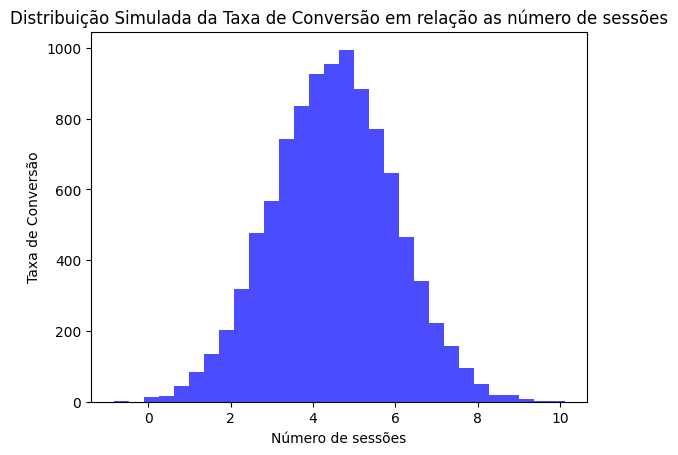

In [87]:
# Data de início das mudanças
data_inicio_mudancas = pd.Timestamp('2023-04-01')

# Separar dados antes e depois das mudanças
df_antes = df[df['Data'] < data_inicio_mudancas]
df_depois = df[df['Data'] >= data_inicio_mudancas]

# Calcular estatísticas para a taxa de rejeição e o volume de tráfego
media_antes_rejeicao = df_antes['Sessões'].mean()
media_depois_rejeicao = df_depois['Sessões'].mean()
std_antes_rejeicao = df_antes['Sessões'].std()
std_depois_rejeicao = df_depois['Sessões'].std()

media_antes_trafego = df_antes['Taxa de Conversão (%)'].mean()
media_depois_trafego = df_depois['Taxa de Conversão (%)'].mean()
std_antes_trafego = df_antes['Taxa de Conversão (%)'].std()
std_depois_trafego = df_depois['Taxa de Conversão (%)'].std()

# Função de simulação que respeita as variações históricas máximas e divide a contribuição das mudanças
def simular_impacto(n_simulacoes):
    resultados_rejeicao = []
    resultados_trafego = []

    for _ in range(n_simulacoes):
        contribuicao_ui = np.random.uniform(0, 1)  # Pode ajustar para refletir melhor a contribuição estimada
        contribuicao_velocidade = 1 - contribuicao_ui

        ajuste_rejeicao = (media_depois_rejeicao - media_antes_rejeicao) * contribuicao_ui
        ajuste_trafego = (media_depois_trafego - media_antes_trafego) * contribuicao_velocidade

        nova_taxa_rejeicao = np.random.normal(media_antes_rejeicao + ajuste_rejeicao, std_depois_rejeicao)
        novo_volume_trafego = np.random.normal(media_antes_trafego + ajuste_trafego, std_depois_trafego)

        resultados_rejeicao.append(nova_taxa_rejeicao)
        resultados_trafego.append(novo_volume_trafego)

    return resultados_rejeicao, resultados_trafego

pageviews = df["Taxa de Conversão (%)"].values

# Estatísticas básicas
media = np.mean(pageviews)
desvio_padrao = np.std(pageviews)

# Número de simulações
n_simulacoes = 10000
num_visitas_simuladas = np.random.normal(media, desvio_padrao, n_simulacoes)

plt.hist(num_visitas_simuladas, bins=30, color='blue', alpha=0.7)
plt.title('Distribuição Simulada da Taxa de Conversão em relação as número de sessões')
plt.xlabel('Número de sessões')
plt.ylabel('Taxa de Conversão')
plt.show()

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

Eu plotei os gráficos das outras variáveis que havia escolhido no início. Observando os gráficos, podemos ver que a variável que teve o melhor desempenho foi o número de Páginas por Sessão, uma vez que teve o maior valor de Taxa de Conversão.

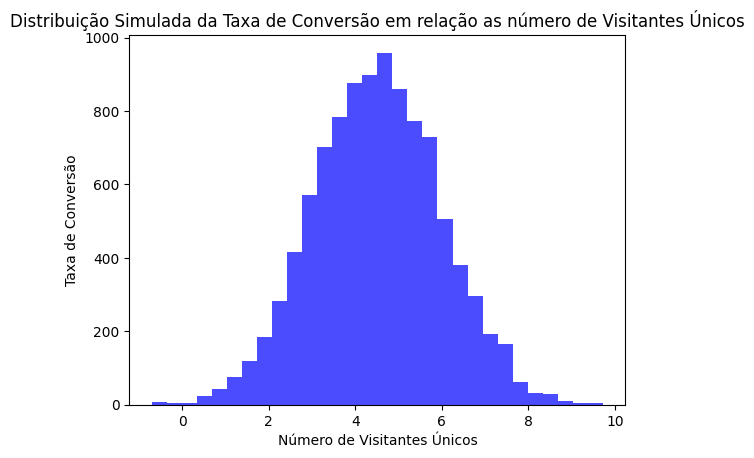

In [88]:
# Data de início das mudanças
data_inicio_mudancas = pd.Timestamp('2023-04-01')

# Separar dados antes e depois das mudanças
df_antes = df[df['Data'] < data_inicio_mudancas]
df_depois = df[df['Data'] >= data_inicio_mudancas]

# Calcular estatísticas para a taxa de rejeição e o volume de tráfego
media_antes_rejeicao = df_antes['Visitantes Únicos'].mean()
media_depois_rejeicao = df_depois['Visitantes Únicos'].mean()
std_antes_rejeicao = df_antes['Visitantes Únicos'].std()
std_depois_rejeicao = df_depois['Visitantes Únicos'].std()

media_antes_trafego = df_antes['Taxa de Conversão (%)'].mean()
media_depois_trafego = df_depois['Taxa de Conversão (%)'].mean()
std_antes_trafego = df_antes['Taxa de Conversão (%)'].std()
std_depois_trafego = df_depois['Taxa de Conversão (%)'].std()

# Função de simulação que respeita as variações históricas máximas e divide a contribuição das mudanças
def simular_impacto(n_simulacoes):
    resultados_rejeicao = []
    resultados_trafego = []

    for _ in range(n_simulacoes):
        contribuicao_ui = np.random.uniform(0, 1)  # Pode ajustar para refletir melhor a contribuição estimada
        contribuicao_velocidade = 1 - contribuicao_ui

        ajuste_rejeicao = (media_depois_rejeicao - media_antes_rejeicao) * contribuicao_ui
        ajuste_trafego = (media_depois_trafego - media_antes_trafego) * contribuicao_velocidade

        nova_taxa_rejeicao = np.random.normal(media_antes_rejeicao + ajuste_rejeicao, std_depois_rejeicao)
        novo_volume_trafego = np.random.normal(media_antes_trafego + ajuste_trafego, std_depois_trafego)

        resultados_rejeicao.append(nova_taxa_rejeicao)
        resultados_trafego.append(novo_volume_trafego)

    return resultados_rejeicao, resultados_trafego

pageviews = df["Taxa de Conversão (%)"].values

# Estatísticas básicas
media = np.mean(pageviews)
desvio_padrao = np.std(pageviews)

# Número de simulações
n_simulacoes = 10000
num_visitas_simuladas = np.random.normal(media, desvio_padrao, n_simulacoes)

plt.hist(num_visitas_simuladas, bins=30, color='blue', alpha=0.7)
plt.title('Distribuição Simulada da Taxa de Conversão em relação as número de Visitantes Únicos')
plt.xlabel('Número de Visitantes Únicos')
plt.ylabel('Taxa de Conversão')
plt.show()

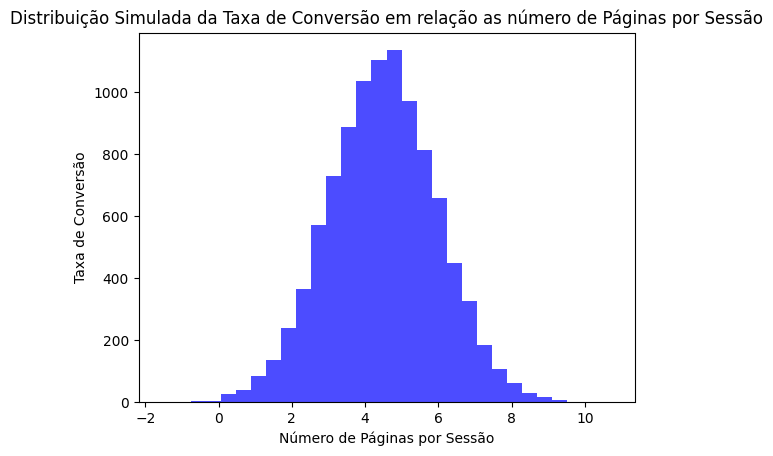

In [89]:
# Data de início das mudanças
data_inicio_mudancas = pd.Timestamp('2023-04-01')

# Separar dados antes e depois das mudanças
df_antes = df[df['Data'] < data_inicio_mudancas]
df_depois = df[df['Data'] >= data_inicio_mudancas]

# Calcular estatísticas para a taxa de rejeição e o volume de tráfego
media_antes_rejeicao = df_antes['Páginas por Sessão'].mean()
media_depois_rejeicao = df_depois['Páginas por Sessão'].mean()
std_antes_rejeicao = df_antes['Páginas por Sessão'].std()
std_depois_rejeicao = df_depois['Páginas por Sessão'].std()

media_antes_trafego = df_antes['Taxa de Conversão (%)'].mean()
media_depois_trafego = df_depois['Taxa de Conversão (%)'].mean()
std_antes_trafego = df_antes['Taxa de Conversão (%)'].std()
std_depois_trafego = df_depois['Taxa de Conversão (%)'].std()

# Função de simulação que respeita as variações históricas máximas e divide a contribuição das mudanças
def simular_impacto(n_simulacoes):
    resultados_rejeicao = []
    resultados_trafego = []

    for _ in range(n_simulacoes):
        contribuicao_ui = np.random.uniform(0, 1)  # Pode ajustar para refletir melhor a contribuição estimada
        contribuicao_velocidade = 1 - contribuicao_ui

        ajuste_rejeicao = (media_depois_rejeicao - media_antes_rejeicao) * contribuicao_ui
        ajuste_trafego = (media_depois_trafego - media_antes_trafego) * contribuicao_velocidade

        nova_taxa_rejeicao = np.random.normal(media_antes_rejeicao + ajuste_rejeicao, std_depois_rejeicao)
        novo_volume_trafego = np.random.normal(media_antes_trafego + ajuste_trafego, std_depois_trafego)

        resultados_rejeicao.append(nova_taxa_rejeicao)
        resultados_trafego.append(novo_volume_trafego)

    return resultados_rejeicao, resultados_trafego

pageviews = df["Taxa de Conversão (%)"].values

# Estatísticas básicas
media = np.mean(pageviews)
desvio_padrao = np.std(pageviews)

# Número de simulações
n_simulacoes = 10000
num_visitas_simuladas = np.random.normal(media, desvio_padrao, n_simulacoes)

plt.hist(num_visitas_simuladas, bins=30, color='blue', alpha=0.7)
plt.title('Distribuição Simulada da Taxa de Conversão em relação as número de Páginas por Sessão')
plt.xlabel('Número de Páginas por Sessão')
plt.ylabel('Taxa de Conversão')
plt.show()

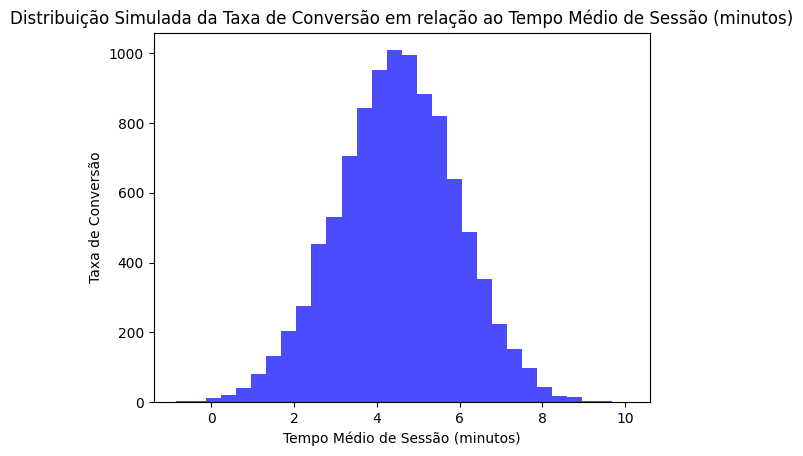

In [90]:
# Data de início das mudanças
data_inicio_mudancas = pd.Timestamp('2023-04-01')

# Separar dados antes e depois das mudanças
df_antes = df[df['Data'] < data_inicio_mudancas]
df_depois = df[df['Data'] >= data_inicio_mudancas]

# Calcular estatísticas para a taxa de rejeição e o volume de tráfego
media_antes_rejeicao = df_antes['Tempo Médio de Sessão (minutos)'].mean()
media_depois_rejeicao = df_depois['Tempo Médio de Sessão (minutos)'].mean()
std_antes_rejeicao = df_antes['Tempo Médio de Sessão (minutos)'].std()
std_depois_rejeicao = df_depois['Tempo Médio de Sessão (minutos)'].std()

media_antes_trafego = df_antes['Taxa de Conversão (%)'].mean()
media_depois_trafego = df_depois['Taxa de Conversão (%)'].mean()
std_antes_trafego = df_antes['Taxa de Conversão (%)'].std()
std_depois_trafego = df_depois['Taxa de Conversão (%)'].std()

# Função de simulação que respeita as variações históricas máximas e divide a contribuição das mudanças
def simular_impacto(n_simulacoes):
    resultados_rejeicao = []
    resultados_trafego = []

    for _ in range(n_simulacoes):
        contribuicao_ui = np.random.uniform(0, 1)  # Pode ajustar para refletir melhor a contribuição estimada
        contribuicao_velocidade = 1 - contribuicao_ui

        ajuste_rejeicao = (media_depois_rejeicao - media_antes_rejeicao) * contribuicao_ui
        ajuste_trafego = (media_depois_trafego - media_antes_trafego) * contribuicao_velocidade

        nova_taxa_rejeicao = np.random.normal(media_antes_rejeicao + ajuste_rejeicao, std_depois_rejeicao)
        novo_volume_trafego = np.random.normal(media_antes_trafego + ajuste_trafego, std_depois_trafego)

        resultados_rejeicao.append(nova_taxa_rejeicao)
        resultados_trafego.append(novo_volume_trafego)

    return resultados_rejeicao, resultados_trafego

pageviews = df["Taxa de Conversão (%)"].values

# Estatísticas básicas
media = np.mean(pageviews)
desvio_padrao = np.std(pageviews)

# Número de simulações
n_simulacoes = 10000
num_visitas_simuladas = np.random.normal(media, desvio_padrao, n_simulacoes)

plt.hist(num_visitas_simuladas, bins=30, color='blue', alpha=0.7)
plt.title('Distribuição Simulada da Taxa de Conversão em relação ao Tempo Médio de Sessão (minutos)')
plt.xlabel('Tempo Médio de Sessão (minutos)')
plt.ylabel('Taxa de Conversão')
plt.show()

\## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.